In [76]:
#imported packags
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
from sklearn.datasets import load_iris
iris=load_iris()


In [78]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [79]:
y=pd.Categorical.from_codes(iris.target,iris.target_names)
y

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [80]:
#STEP 2 : (Discribe the data)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [81]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [83]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [84]:
df.shape

(150, 4)

In [85]:
q=df['sepal length (cm)'].quantile()
q

5.8

In [86]:
df.nunique()


sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

In [87]:
#STEM-3 (DATA ANALISYS WITH VISUALIZATION AND UNIVARIATE DATA , BYVARIATE DATA)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='sepal length (cm)', ylabel='Count'>

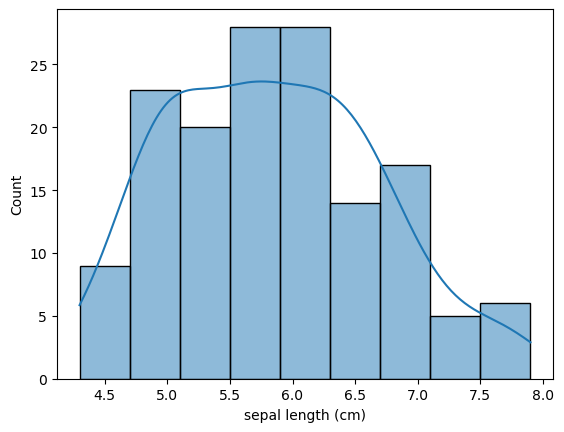

In [88]:
#univariate data(histogram plot)
sns.histplot(data=df,x='sepal length (cm)',kde=True)


<Axes: xlabel='sepal length (cm)'>

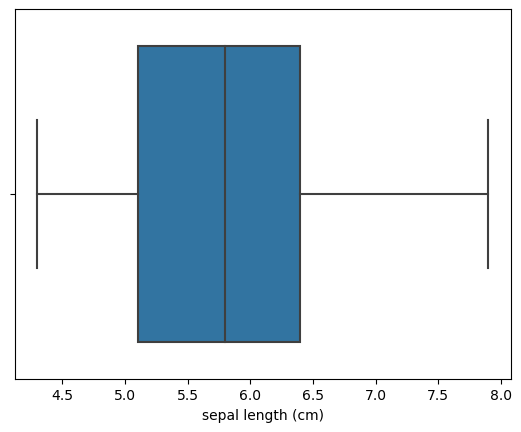

In [89]:
#boxplot
sns.boxplot(data=df,x='sepal length (cm)')

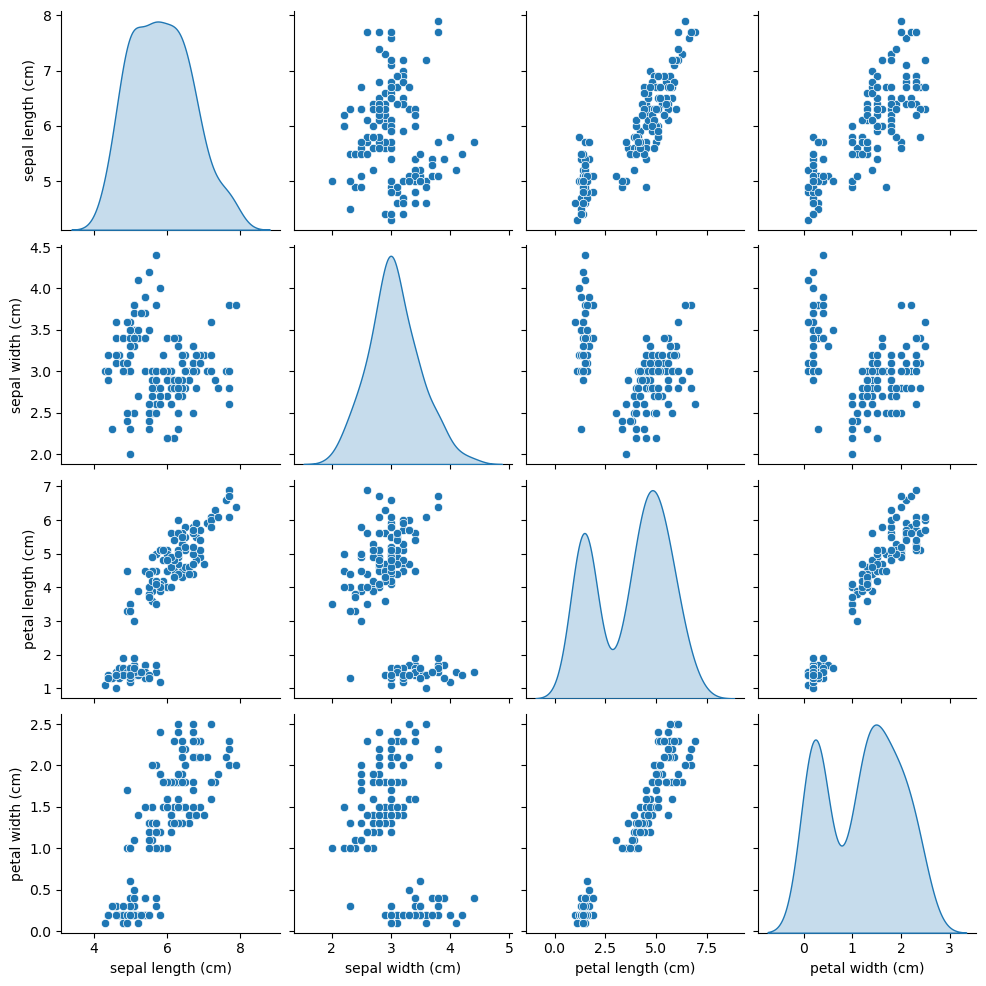

In [90]:
#byvariate data
sns.pairplot(df,diag_kind='kde')

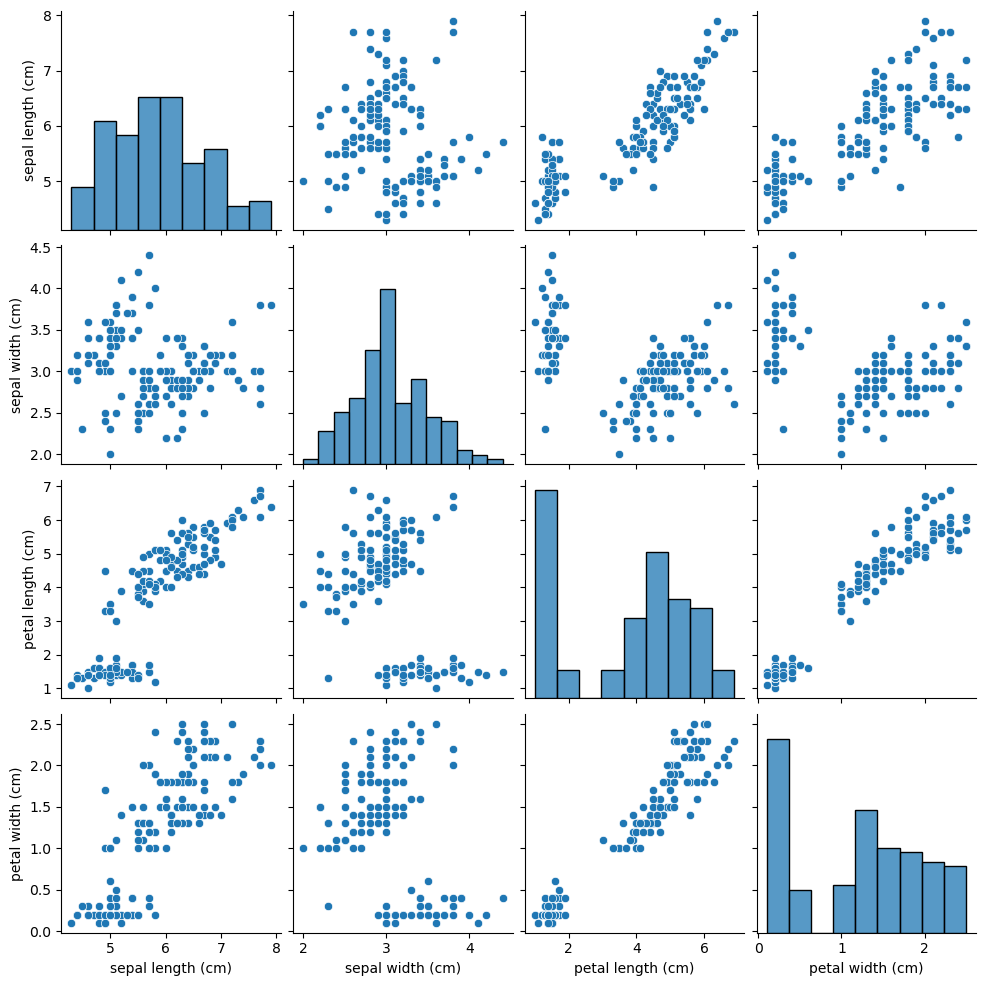

In [91]:
sns.pairplot(df)

In [97]:
x=df[['sepal length (cm)','sepal width (cm)']]
y=iris.target 

In [93]:
#STEP 4 DATA PREPROCESSING (MISSING_VALUES,DROP,DROP_IMUTATION,DATA_TRANSFORMATION,DATA_NORMALIZATION)
missing_values=df.isna()
missing_values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [94]:
df.drop(['petal width (cm)'],axis=1,inplace=True)

In [44]:
#STEP 5 (DATA SPLITING)
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [99]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


In [100]:
#STEP 6 (MODEL SELECTION (LOGISTICREGRESSION))
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [101]:
model=lr.fit(x_train,y_train)

In [102]:
#step 7 : (data evaluation)
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
y_pred=model.predict(x_train)

In [104]:
conf_m=confusion_matrix(y_train,y_pred)
conf_m

array([[39,  0,  0],
       [ 0, 27, 10],
       [ 0,  8, 36]], dtype=int64)

In [105]:
report = classification_report(y_train,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        39\n           1       0.77      0.73      0.75        37\n           2       0.78      0.82      0.80        44\n\n    accuracy                           0.85       120\n   macro avg       0.85      0.85      0.85       120\nweighted avg       0.85      0.85      0.85       120\n'

In [109]:
#for test 
y_pred_test=model.predict(x_test)

In [111]:
conf_m_test=confusion_matrix(y_test,y_pred_test)
print(conf_m_test)

[[11  0  0]
 [ 0  8  5]
 [ 0  3  3]]


In [113]:
report = classification_report(y_test,y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      0.62      0.67        13
           2       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.76      0.73      0.74        30

